In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,precision_recall_fscore_support, confusion_matrix,accuracy_score

In [3]:
df = pd.read_csv(r"C:\Users\stuar\Documents\College\Data Mining\Assignment\breast-cancer-wisconsin.data",header=None)
df.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [4]:
df.head()
df= df.replace("?",np.NaN)
df=df.dropna()

In [5]:
df.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [287]:
X = df.drop('Class', axis=1).to_numpy()
Y = df['Class']

In [288]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)

### Max_Depth=1, Default= Gini

In [289]:
classifier = DecisionTreeClassifier(criterion='gini',max_depth = 1, random_state = 0,min_samples_split=5,min_samples_leaf=2)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)


print("\nConfusion Matrix 1")
confusion1=confusion_matrix(Y_test,Y_pred)
print("\n",confusion1)


#Classification report
print(classification_report(Y_test, Y_pred,digits=3))

print("\nClassification Error: ",(1-(accuracy_score(Y_test, Y_pred))))



Confusion Matrix 1

 [[98  9]
 [ 5 59]]
              precision    recall  f1-score   support

           2      0.951     0.916     0.933       107
           4      0.868     0.922     0.894        64

    accuracy                          0.918       171
   macro avg      0.910     0.919     0.914       171
weighted avg      0.920     0.918     0.919       171


Classification Error:  0.08187134502923976


In [290]:
from sklearn.tree import export_graphviz
export_graphviz(classifier, out_file='tree_1.dot' ,max_depth=5,
                rounded=True, proportion=False, precision=2, filled=True
               )
!dot -Tpng tree_1.dot -o tree_1.png -Gdpi=100

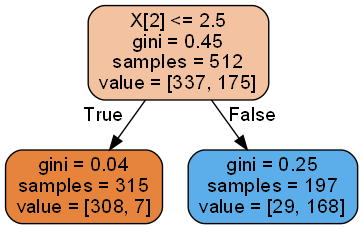

In [291]:
from IPython.display import Image
Image(filename="tree_1.png")

In [292]:
print("Information Gain for the first split """"(Criterion=Gini)\n""""")
result_gini = 0.45 - ((315/512)*0.04)-((197/512)*0.25)
print("Information Gain: ",result_gini)

Information Gain for the first split (Criterion=Gini)

Information Gain:  0.32919921875


### Max_Depth=2, Default= Gini

In [293]:
classifier = DecisionTreeClassifier(criterion='gini',max_depth = 3, random_state = 0,min_samples_split=5,min_samples_leaf=2)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)


print("\nConfusion Matrix 2 ")
confusion2=confusion_matrix(Y_test,Y_pred)
print("\n",confusion2)

#Classification report
print(classification_report(Y_test, Y_pred,digits=3))




Confusion Matrix 2 

 [[101   6]
 [  6  58]]
              precision    recall  f1-score   support

           2      0.944     0.944     0.944       107
           4      0.906     0.906     0.906        64

    accuracy                          0.930       171
   macro avg      0.925     0.925     0.925       171
weighted avg      0.930     0.930     0.930       171



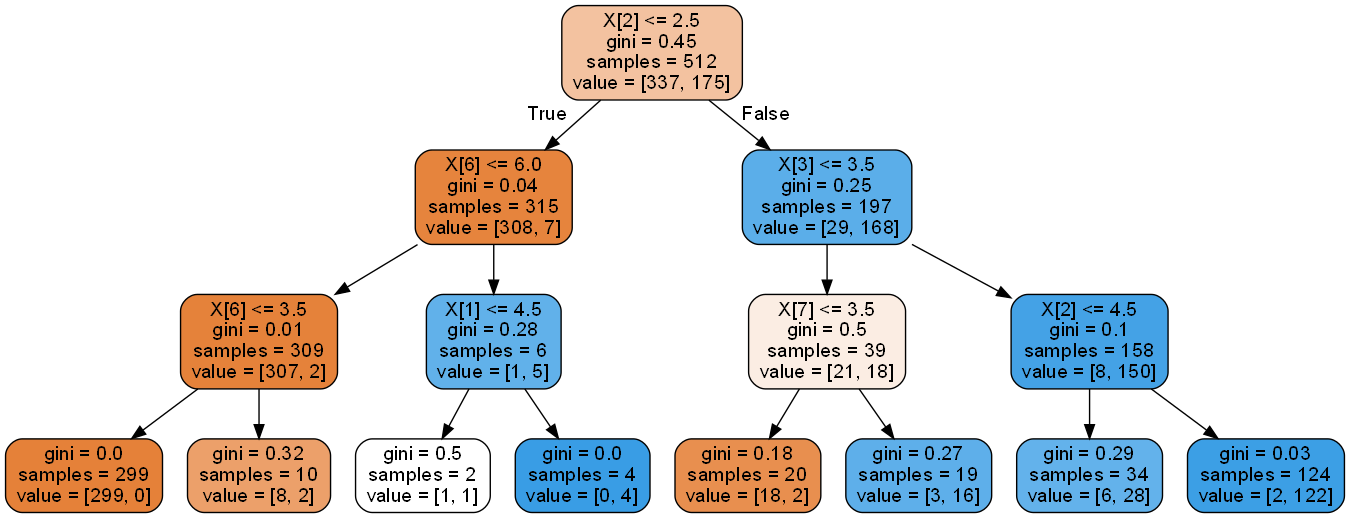

In [294]:
from sklearn.tree import export_graphviz
from IPython.display import Image
export_graphviz(classifier, out_file='tree_2.dot' ,max_depth=5,
                rounded=True, proportion=False, precision=2, filled=True
               )
!dot -Tpng tree_2.dot -o tree_2.png -Gdpi=100
Image(filename="tree_2.png")

# Entropy

In [295]:
classifier1 = DecisionTreeClassifier(criterion='entropy',max_depth = 1, random_state = 0,min_samples_split=5,min_samples_leaf=2)
classifier1.fit(X_train,Y_train)
Y_pred = classifier1.predict(X_test)


print("\nConfusion Matrix 3")
confusion3=confusion_matrix(Y_test,Y_pred)
print("\nconfusion3")


#Classification report
print(classification_report(Y_test, Y_pred,digits=3))

print("\nClassification Error: ",(1-(accuracy_score(Y_test, Y_pred))))



Confusion Matrix 3

confusion3
              precision    recall  f1-score   support

           2      0.951     0.916     0.933       107
           4      0.868     0.922     0.894        64

    accuracy                          0.918       171
   macro avg      0.910     0.919     0.914       171
weighted avg      0.920     0.918     0.919       171


Classification Error:  0.08187134502923976


In [296]:
from sklearn.tree import export_graphviz

In [297]:
export_graphviz(classifier1, out_file='tree_3.dot' ,max_depth=5,
                rounded=True, proportion=False, precision=2, filled=True
               )

In [298]:
!dot -Tpng tree_3.dot -o tree_3.png -Gdpi=100

In [299]:
from IPython.display import Image

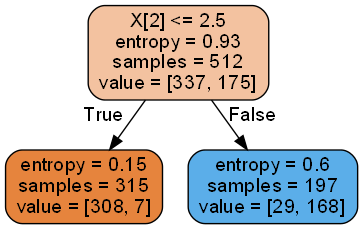

In [300]:
Image(filename="tree_3.png")

In [301]:
print("Information Gain for the first split """"(Criterion=Entropy)\n""""")
result_entropy = 0.93 - ((315/512)*0.15)-((197/512)*0.6)
print("Information Gain: ",result_entropy)

Information Gain for the first split (Criterion=Entropy)

Information Gain:  0.6068554687500001


### *Feature Selected for the first split is Uniformity of Cell Size
### *Decision Boundary is determined by the value 2.5 
### (X[2]<=2.5) 